# SCRAPING DATA FROM A WEBSITE *+ PANDAS*

In [1]:
from bs4 import BeautifulSoup #importing BS4 and getting ready with url address
import requests

headers = {                                                                # due to legal policy issues needed to have User agen created to comply with Wikipedia rules.   
    'User-Agent': 'Papp lallei panxx18/1.0 (pashadenysyuk0@gmail.com)',
    'From': 'pashadenysyuk0@gmail.com'
}
url = 'https://en.wikipedia.org/wiki/List_of_largest_Polish_companies'
page = requests.get(url, headers=headers)
soup=BeautifulSoup(page.text, 'html')

In [2]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest Polish companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-fon

In [3]:
#There more than one unique table on the page, so it's better to use find since we are using only the first one this time.
<table class="wikitable sortable static-row-numbers jquery-tablesorter" style="text-align:right"> == $0
#<table class="wikitable sortable static-row-numbers jquery-tablesorter" style="text-align:right"> == $0

SyntaxError: invalid syntax (1952197201.py, line 2)

In [3]:
# for learning purposes we can 1st go with find_all and then choose what we need
soup.find_all('table')[0]

<table class="wikitable sortable static-row-numbers" style="text-align:right">
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Name
</th>
<th rowspan="2">Headquarters
</th>
<th>Revenue
</th>
<th>Profit
</th>
<th rowspan="2">Employees
</th>
<th rowspan="2">Industry
</th>
<th rowspan="2">Majority/Plurality ownership
</th></tr>
<tr>
<th colspan="2"><a class="mw-redirect" href="/wiki/EUR" title="EUR">EUR</a> millions
</th></tr>
<tr>
<td style="text-align:left"><a href="/wiki/Orlen" title="Orlen">Orlen</a>
</td>
<td style="text-align:left"><a href="/wiki/P%C5%82ock" title="Płock">Płock</a>
</td>
<td>69,000
</td>
<td>324
</td>
<td>67,809
</td>
<td style="text-align:left"><a href="/wiki/Petroleum" title="Petroleum">Petroleum industry</a>
</td>
<td style="text-align:left"><a class="mw-redirect" href="/wiki/State_Treasury" title="State Treasury">State Treasury</a> of <a href="/wiki/Poland" title="Poland">Poland</a>
</td></tr>
<tr>
<td style

In [4]:
table = soup.find('table', class_ = "wikitable sortable static-row-numbers") #this way we look for the exact table we need
table # additionally, here we need to pay attention to search for 'table', not for 'soup' (so the whole url)

<table class="wikitable sortable static-row-numbers" style="text-align:right">
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Name
</th>
<th rowspan="2">Headquarters
</th>
<th>Revenue
</th>
<th>Profit
</th>
<th rowspan="2">Employees
</th>
<th rowspan="2">Industry
</th>
<th rowspan="2">Majority/Plurality ownership
</th></tr>
<tr>
<th colspan="2"><a class="mw-redirect" href="/wiki/EUR" title="EUR">EUR</a> millions
</th></tr>
<tr>
<td style="text-align:left"><a href="/wiki/Orlen" title="Orlen">Orlen</a>
</td>
<td style="text-align:left"><a href="/wiki/P%C5%82ock" title="Płock">Płock</a>
</td>
<td>69,000
</td>
<td>324
</td>
<td>67,809
</td>
<td style="text-align:left"><a href="/wiki/Petroleum" title="Petroleum">Petroleum industry</a>
</td>
<td style="text-align:left"><a class="mw-redirect" href="/wiki/State_Treasury" title="State Treasury">State Treasury</a> of <a href="/wiki/Poland" title="Poland">Poland</a>
</td></tr>
<tr>
<td style

In [5]:
world_titles = table.find_all('th') # now we want to get more closer of pulling the column names out
world_titles

[<th rowspan="2">Name
 </th>,
 <th rowspan="2">Headquarters
 </th>,
 <th>Revenue
 </th>,
 <th>Profit
 </th>,
 <th rowspan="2">Employees
 </th>,
 <th rowspan="2">Industry
 </th>,
 <th rowspan="2">Majority/Plurality ownership
 </th>,
 <th colspan="2"><a class="mw-redirect" href="/wiki/EUR" title="EUR">EUR</a> millions
 </th>]

In [6]:
world_table_titles = [title.text.strip() for title in world_titles]
world_table_titles

['Name',
 'Headquarters',
 'Revenue',
 'Profit',
 'Employees',
 'Industry',
 'Majority/Plurality ownership',
 'EUR millions']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(columns=world_table_titles)
df.insert(0, 'Rank', range(1, len(df) +1))
df

,Rank,Name,Headquarters,Revenue,Profit,Employees,Industry,Majority/Plurality ownership,EUR millions


In [ ]:
# now we'd need the data (and rows); <tr> stands for rows and <td> stand for data (see scs)

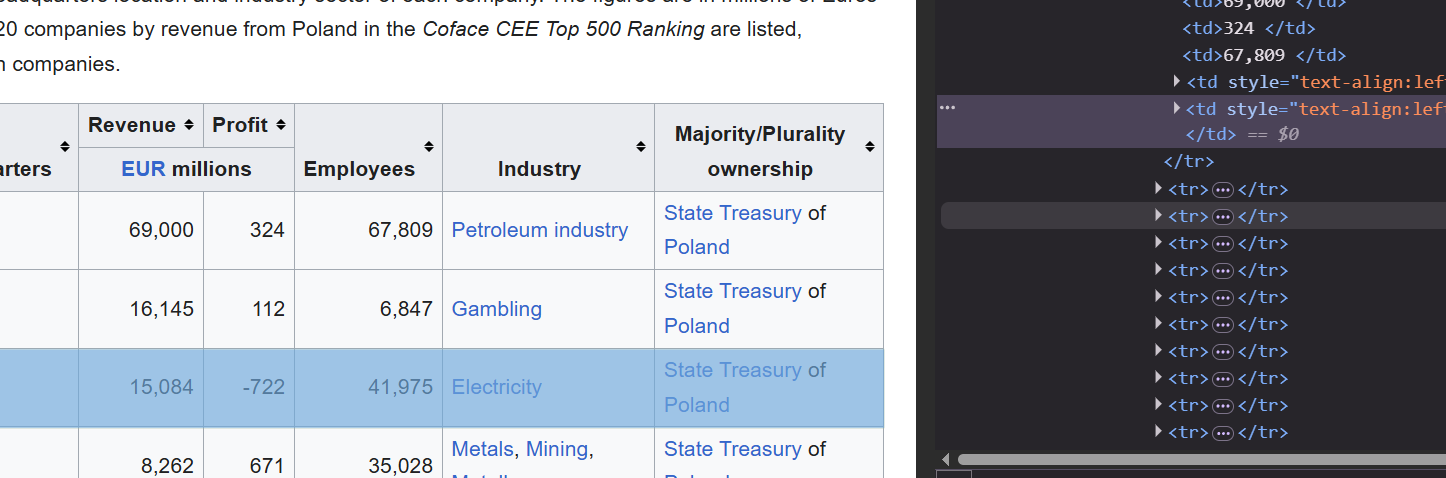

In [9]:
column_data = table.find_all('tr')

In [12]:
for row in column_data[2:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)                                      # each time it loops it pulls out a new row as it goes through

['Orlen', 'Płock', '69,000', '324', '67,809', 'Petroleum industry', 'State Treasury of Poland']
['Totalizator Sportowy\xa0[pl]', 'Warsaw', '16,145', '112', '6,847', 'Gambling', 'State Treasury of Poland']
['PGE', 'Warsaw', '15,084', '-722', '41,975', 'Electricity', 'State Treasury of Poland']
['KGHM', 'Lubin', '8,262', '671', '35,028', 'Metals, Mining, Metallurgy', 'State Treasury of Poland']
['Enea', 'Poznań', '7,713', '224', '18,037', 'Electricity', 'State Treasury of Poland']
['Tauron', 'Katowice', '7,611', '138', '18,742', 'Electricity', 'State Treasury of Poland']
['Dino', 'Krotoszyn', '6,848', '352', '49,887', 'Retail', 'Tomasz Biernacki\xa0[pl]']
['PSE', 'Warsaw', '5,942', '667', '2,968', 'Electricity', 'State Treasury of Poland']
['LPP', 'Gdańsk', '4,724', '409', '22,821', 'Textile, Footwear', 'Marek Piechocki\xa0[pl]']
['Inter Cars\xa0[pl]', 'Warsaw', '4,555', '169', '5,261', 'Automotive industry', 'Andrzej Oliszewski']
['Pelion\xa0[pl]', 'Łódź', '4,306', '-6', '12,149', 'Heal

In [89]:
all_rows = []  #going with table and then rows doesn't work - the table on Wikipedia has some columns unnamed/divided which causes errors here, so it's better to first go with collecting all rows
for row in table.find_all('tr'):
    cells=row.find_all('td')     #going through every row on the page and getting all the cells there
    if len(cells) !=7:
        continue

    clean_cells=[cell.get_text(strip=True) for cell in cells]
    all_rows.append(clean_cells)

import pandas as pd              #creating the table itself
df = pd.DataFrame(all_rows)
df.insert(0, 'Rank', range(1, len(df)+1))

if len(headers) == 7:                   #making sure it loads 7 columns
    df.columns = ['Rank'] + headers
    df = df.rename(columns={
        'Revenue': 'Revenue (EUR millions)',        #adjusting 2 column names
        'Profit': 'Profit (EUR millions)'
    })
else:
    print(f'Warning: page gave {len(headers)} headers, but data has 7 columns.')  #just to double check
    if len(headers) >7:
        df.columns = ['Rank'] + headers[:7]


#whis this we can clean the output a bit better
df['Majority/Plurality ownership'] = df['Majority/Plurality ownership'].str.replace('TreasuryofPoland', 'Treasury of Poland', regex=False).str.strip()
df['Majority/Plurality ownership'] = df['Majority/Plurality ownership'].str.replace(r'\[pl\]', '', regex=True).str.strip()
df['Name'] = df['Name'].str.replace(r'\[pl\]', '', regex=True).str.strip()
df['Industry'] = df['Industry'].str.replace(r',([^ ])', r', \1', regex=True).str.strip()

df1 = df.style.hide(axis='index')
df1

Rank,Name,Headquarters,Revenue (EUR millions),Profit (EUR millions),Employees,Industry,Majority/Plurality ownership
1,Orlen,Płock,"69,000",324,"67,809",Petroleum industry,State Treasury of Poland
2,Totalizator Sportowy,Warsaw,"16,145",112,"6,847",Gambling,State Treasury of Poland
3,PGE,Warsaw,"15,084",-722,"41,975",Electricity,State Treasury of Poland
4,KGHM,Lubin,"8,262",671,"35,028","Metals, Mining, Metallurgy",State Treasury of Poland
5,Enea,Poznań,"7,713",224,"18,037",Electricity,State Treasury of Poland
6,Tauron,Katowice,"7,611",138,"18,742",Electricity,State Treasury of Poland
7,Dino,Krotoszyn,"6,848",352,"49,887",Retail,Tomasz Biernacki
8,PSE,Warsaw,"5,942",667,"2,968",Electricity,State Treasury of Poland
9,LPP,Gdańsk,"4,724",409,"22,821","Textile, Footwear",Marek Piechocki
10,Inter Cars,Warsaw,"4,555",169,"5,261",Automotive industry,Andrzej Oliszewski


In [100]:
with pd.ExcelWriter('E:\Data Analytics\Beginner courses Data Bootcamp\Python\Analyst\Poland_top_companies.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Top 20 Poland Companies', index=False)

<>:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
<>:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
C:\Users\paul9\AppData\Local\Temp\ipykernel_5844\3731222973.py:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
  with pd.ExcelWriter('E:\Data Analytics\Beginner courses Data Bootcamp\Python\Analyst\Poland_top_companies.xlsx', engine='openpyxl') as writer:


In [48]:
th_elements = table.find('tr')  #getting all the 'tr' headers from the wikipedia's table

headers = []                #extraction and celaning
for th in th_elements.find_all('th'):  
    txt= th.get_text(separator=' ', strip=True)
    txt = txt.replace('↑', '').replace('↓', '').replace('Sort ascending', '').replace('Sort descending', '') #replace wrong places
    txt = ' '.join(txt.split()) #normalize spaces

    if txt and txt not in ['↑', '↓', '']:
        headers.append(txt)

    print('Extracted headers:', headers)
    print('Count:', len(headers))

Extracted headers: ['Name']
Count: 1
Extracted headers: ['Name', 'Headquarters']
Count: 2
Extracted headers: ['Name', 'Headquarters', 'Revenue']
Count: 3
Extracted headers: ['Name', 'Headquarters', 'Revenue', 'Profit']
Count: 4
Extracted headers: ['Name', 'Headquarters', 'Revenue', 'Profit', 'Employees']
Count: 5
Extracted headers: ['Name', 'Headquarters', 'Revenue', 'Profit', 'Employees', 'Industry']
Count: 6
Extracted headers: ['Name', 'Headquarters', 'Revenue', 'Profit', 'Employees', 'Industry', 'Majority/Plurality ownership']
Count: 7
